In [2]:
%load_ext autoreload
%autoreload 2

from setup import setup_project_env
setup_project_env('~/weatherpy-work')

In [3]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

from datasrcs import stormevents
from algs.clusters import st_clusters
from plotting.maps import CartopyMap
from plotting.mapareas import central_plains, dixie

In [10]:
def get_clusters(start_time, end_time, eventtypes=None, eps_km=120, eps_min=90, min_samples=40):
    eventtypes = eventtypes or ['Tornado', 'Hail']
    events = stormevents.load_events(start_time, end_time, eventtypes=eventtypes, tz='CST')
    clusters = st_clusters(events, eps_km=eps_km, eps_min=eps_min, min_samples=min_samples)
    print(f'Number of clusters: {len(clusters)}')
    return clusters

In [11]:
clusts_990503 = get_clusters('1999-05-03 00:00', '1999-05-04 00:00')

../algs/clusters.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pairwise_distance_input['timestamp_sec'] = points.timestamp.astype(np.int64) / 10 ** 9


Number of clusters: 2


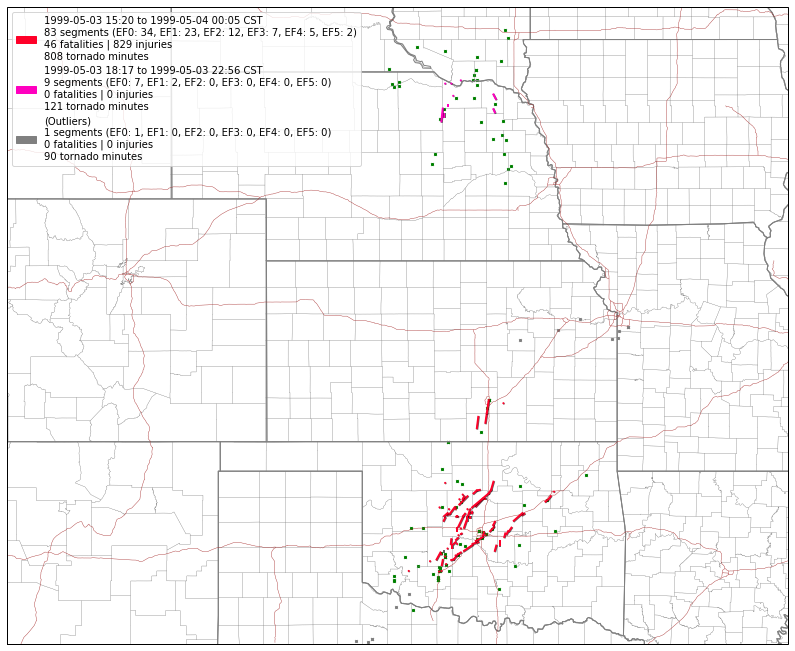

In [12]:
fig = plt.figure(figsize=(14, 14))
proj = ccrs.Mercator()
bgmap = CartopyMap(proj=proj, bbox=central_plains)
bgmap.draw_us_detailed()

plotter = clusts_990503.plotter(bgmap, colors='gist_rainbow')
plotter.tornadoes()
plotter.hail(marker='x', markersize=6, shadow=False, colors=['green'])
plotter.legend()

In [13]:
clusts_080523 = get_clusters('2008-05-23 00:00', '2008-05-24 00:00')

../algs/clusters.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pairwise_distance_input['timestamp_sec'] = points.timestamp.astype(np.int64) / 10 ** 9


Number of clusters: 2


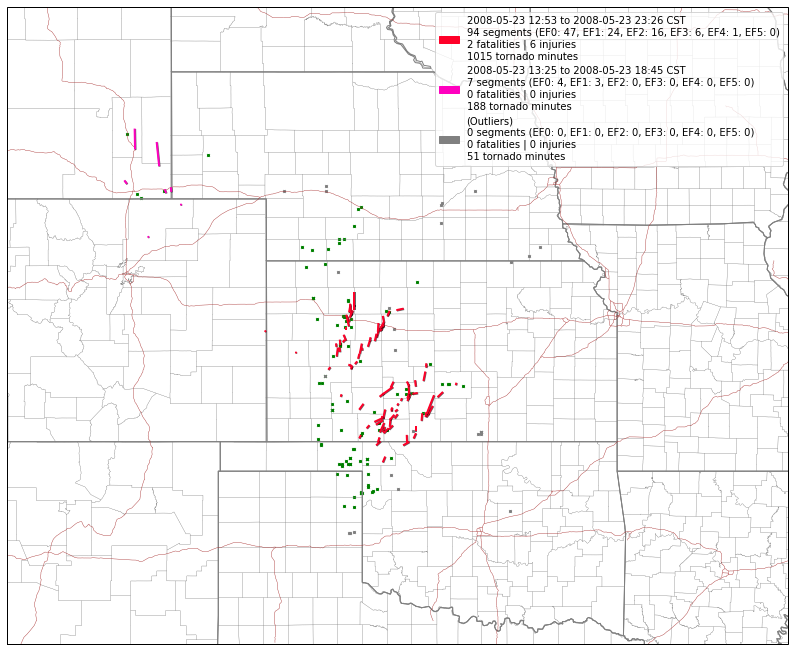

In [14]:
fig = plt.figure(figsize=(14, 14))
proj = ccrs.Mercator()
bgmap = CartopyMap(proj=proj, bbox=central_plains)
bgmap.draw_us_detailed()

plotter = clusts_080523.plotter(bgmap, colors='gist_rainbow')
plotter.tornadoes()
plotter.hail(marker='x', markersize=6, shadow=False, colors=['green'])
plotter.legend()

In [15]:
clusts_110427 = get_clusters('2011-04-27 00:00', '2011-04-28 00:00')

../algs/clusters.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pairwise_distance_input['timestamp_sec'] = points.timestamp.astype(np.int64) / 10 ** 9


Number of clusters: 4


In [18]:
tuple(dixie)

(-97, -79, 28, 37.5)

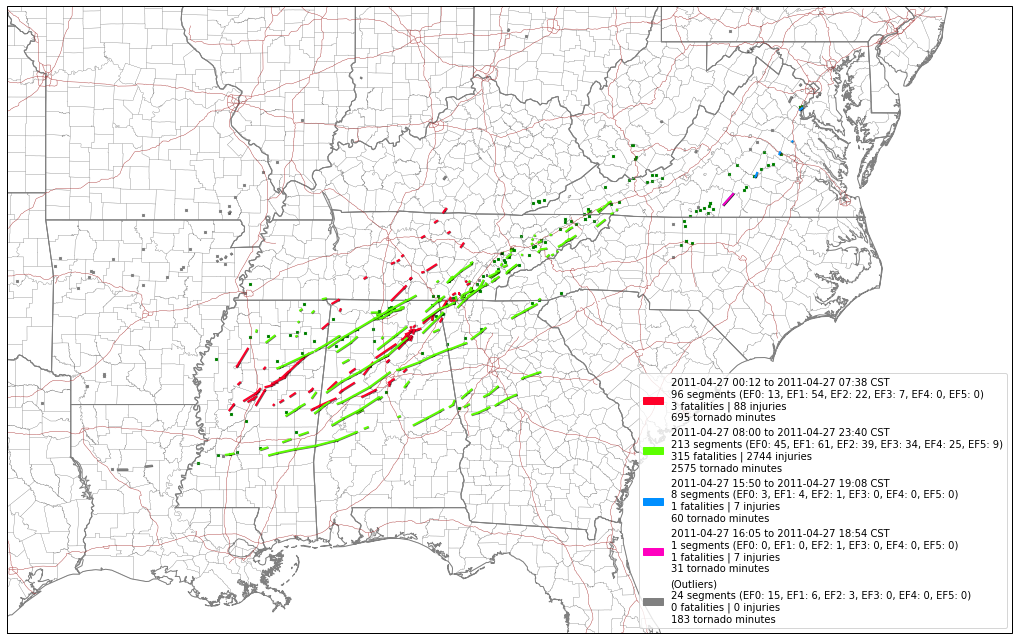

In [23]:
fig = plt.figure(figsize=(18, 18))
proj = ccrs.Mercator()
bgmap = CartopyMap(proj=proj, bbox=(-95.5, -72.5, 28.5, 40))
bgmap.draw_us_detailed()

plotter = clusts_110427.plotter(bgmap, colors='gist_rainbow')
plotter.tornadoes()
plotter.hail(marker='x', markersize=6, shadow=False, colors=['green'])
plotter.legend()